In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import glob

# Define the year range
years = range(2010, 2025)  # Includes 2010 to 2024

# Create a list to store DataFrames
df_list = []

# Iterate through the years and read CSV files
for year in years:
  file_path = f'/content/drive/My Drive/tennis_data/atp_matches_{year}.csv'  # Use f-strings
  try:
    df = pd.read_csv(file_path)
    df_list.append(df)
  except FileNotFoundError:
    print(f"File not found for year: {year}")  # Handle missing files gracefully

# Concatenate all DataFrames
matches = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
matches


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-339,Brisbane,Hard,32,A,20100103,1,104053,1.0,NaN,...,34.0,29.0,11.0,10.0,3.0,5.0,7.0,4410.0,77.0,598.0
1,2010-339,Brisbane,Hard,32,A,20100103,2,104958,NaN,WC,...,34.0,22.0,14.0,9.0,7.0,10.0,134.0,400.0,78.0,590.0
2,2010-339,Brisbane,Hard,32,A,20100103,3,104755,NaN,NaN,...,58.0,38.0,14.0,14.0,7.0,11.0,52.0,850.0,88.0,568.0
3,2010-339,Brisbane,Hard,32,A,20100103,4,105051,NaN,Q,...,29.0,16.0,15.0,9.0,2.0,5.0,285.0,151.0,28.0,1260.0
4,2010-339,Brisbane,Hard,32,A,20100103,5,104607,4.0,NaN,...,41.0,26.0,14.0,9.0,6.0,9.0,20.0,1655.0,251.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42566,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
42567,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
42568,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
42569,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


In [ ]:
clay_matches = matches[matches['surface'] == 'Clay']
clay_matches = clay_matches[clay_matches['draw_size']>=32]
essential_columns = [
    'winner_name', 'loser_name', 'surface', 'score', 'tourney_date', 'round'
]
clay_matches.dropna(subset=essential_columns, inplace=True)


clay_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
305,2010-505,Santiago,Clay,32,A,20100201,1,103602,1.0,NaN,...,39.0,21.0,2.0,7.0,6.0,10.0,11.0,2870.0,71.0,633.0
306,2010-505,Santiago,Clay,32,A,20100201,2,103105,NaN,Q,...,42.0,23.0,5.0,9.0,5.0,10.0,156.0,321.0,120.0,460.0
307,2010-505,Santiago,Clay,32,A,20100201,3,104719,NaN,NaN,...,38.0,25.0,13.0,9.0,5.0,6.0,112.0,483.0,99.0,535.0
308,2010-505,Santiago,Clay,32,A,20100201,4,103997,NaN,NaN,...,71.0,48.0,15.0,15.0,9.0,12.0,61.0,739.0,51.0,821.0
309,2010-505,Santiago,Clay,32,A,20100201,5,105064,3.0,NaN,...,37.0,22.0,12.0,12.0,4.0,11.0,35.0,1121.0,97.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41520,2024-0096,Paris Olympics,Clay,64,O,20240729,164,207989,2.0,NaN,...,46.0,33.0,12.0,10.0,3.0,5.0,3.0,8130.0,13.0,3410.0
41521,2024-0096,Paris Olympics,Clay,64,O,20240729,165,104925,1.0,NaN,...,38.0,22.0,10.0,9.0,8.0,13.0,2.0,8460.0,16.0,2340.0
41522,2024-0096,Paris Olympics,Clay,64,O,20240729,166,207989,2.0,NaN,...,35.0,21.0,4.0,7.0,4.0,9.0,3.0,8130.0,19.0,2115.0
41523,2024-0096,Paris Olympics,Clay,64,O,20240729,167,104925,1.0,NaN,...,65.0,47.0,16.0,12.0,6.0,6.0,2.0,8460.0,3.0,8130.0


In [ ]:
print("Clay matches:", len(clay_matches))
print(clay_matches['tourney_name'].value_counts().head(10))

Clay matches: 9886
tourney_name
Roland Garros          1905
Rome Masters            904
Madrid Masters          850
Monte Carlo Masters     770
Barcelona               682
Hamburg                 525
Buenos Aires            398
Munich                  278
Gstaad                  247
Kitzbuhel               243
Name: count, dtype: int64


# **Initial Features**
# **Features**
- rank_diff
-seed_diff
-age_diff
-height_diff
-round_encoded

In [ ]:
clay_matches['rank_diff'] = clay_matches['winner_rank'] - clay_matches['loser_rank']
clay_matches['seed_diff'] = clay_matches['winner_seed'] - clay_matches['loser_seed']
clay_matches['age_diff'] = clay_matches['winner_age'] - clay_matches['loser_age']
clay_matches['height_diff'] = clay_matches['winner_ht'] - clay_matches['loser_ht']

In [ ]:
# endoding the rounds

In [ ]:
round_map = {
    'Round of 128': 1,
    'R128': 1,
    'Round of 64': 2,
    'R64': 2,
    'Round of 32': 3,
    'R32': 3,
    'Round of 16': 4,
    'R16': 4,
    'Fourth Round': 4,
    'Quarterfinals': 5,
    'QF': 5,
    'Semifinals': 6,
    'SF': 6,
    'Final': 7,
    'F': 7
}
clay_matches['round_encoded'] = clay_matches['round'].map(round_map)
#remove round robbins and Bronze matches from olympic
clay_matches = clay_matches[~clay_matches['round'].isin(['RR', 'BR'])]

clay_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,rank_diff,seed_diff,age_diff,height_diff,round_encoded
305,2010-505,Santiago,Clay,32,A,20100201,1,103602,1.0,NaN,...,10.0,11.0,2870.0,71.0,633.0,-60.0,NaN,-2.3,3.0,3.0
306,2010-505,Santiago,Clay,32,A,20100201,2,103105,NaN,Q,...,10.0,156.0,321.0,120.0,460.0,36.0,NaN,4.4,-2.0,3.0
307,2010-505,Santiago,Clay,32,A,20100201,3,104719,NaN,NaN,...,6.0,112.0,483.0,99.0,535.0,13.0,NaN,-6.1,7.0,3.0
308,2010-505,Santiago,Clay,32,A,20100201,4,103997,NaN,NaN,...,12.0,61.0,739.0,51.0,821.0,10.0,NaN,3.0,2.0,3.0
309,2010-505,Santiago,Clay,32,A,20100201,5,105064,3.0,NaN,...,11.0,35.0,1121.0,97.0,540.0,-62.0,NaN,-11.4,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41519,2024-0096,Paris Olympics,Clay,64,O,20240729,163,200000,13.0,NaN,...,16.0,19.0,2115.0,9.0,3880.0,10.0,7.0,-1.7,10.0,5.0
41520,2024-0096,Paris Olympics,Clay,64,O,20240729,164,207989,2.0,NaN,...,5.0,3.0,8130.0,13.0,3410.0,-10.0,-7.0,-6.0,-2.0,5.0
41521,2024-0096,Paris Olympics,Clay,64,O,20240729,165,104925,1.0,NaN,...,13.0,2.0,8460.0,16.0,2340.0,-14.0,-10.0,14.7,3.0,6.0
41522,2024-0096,Paris Olympics,Clay,64,O,20240729,166,207989,2.0,NaN,...,9.0,3.0,8130.0,19.0,2115.0,-16.0,-11.0,-2.7,-10.0,6.0


# **Calculating elo Rating**
- calculate elo
- pin it up against ATP points



In [ ]:
INITIAL_ELO = 1500
K = 32
elo_dict = {}

elo_A_list = []
elo_B_list = []

if not clay_matches.empty:
    for idx, row in clay_matches.iterrows():
        player_A = row['winner_name']
        player_B = row['loser_name']

        elo_A = elo_dict.get(player_A, INITIAL_ELO)
        elo_B = elo_dict.get(player_B, INITIAL_ELO)

        elo_A_list.append(elo_A)
        elo_B_list.append(elo_B)

        expected_A = 1 / (1 + 10 ** ((elo_B - elo_A) / 400))
        score_A = 1

        new_elo_A = elo_A + K * (score_A - expected_A)
        new_elo_B = elo_B + K * ((1 - score_A) - (1 - expected_A))

        elo_dict[player_A] = new_elo_A
        elo_dict[player_B] = new_elo_B

    clay_matches = clay_matches.copy()  # <- this is key
    clay_matches.loc[:, 'elo_A'] = elo_A_list
    clay_matches.loc[:, 'elo_B'] = elo_B_list
    clay_matches.loc[:, 'elo_diff'] = clay_matches['elo_A'] - clay_matches['elo_B']

clay_matches['tourney_date'] = pd.to_datetime(clay_matches['tourney_date'], format='%Y%m%d')
clay_matches['year'] = clay_matches['tourney_date'].dt.year
clay_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser_rank_points,rank_diff,seed_diff,age_diff,height_diff,round_encoded,elo_A,elo_B,elo_diff,year
305,2010-505,Santiago,Clay,32,A,2010-02-01,1,103602,1.0,NaN,...,633.0,-60.0,NaN,-2.3,3.0,3.0,1500.000000,1500.000000,0.000000,2010
306,2010-505,Santiago,Clay,32,A,2010-02-01,2,103105,NaN,Q,...,460.0,36.0,NaN,4.4,-2.0,3.0,1500.000000,1500.000000,0.000000,2010
307,2010-505,Santiago,Clay,32,A,2010-02-01,3,104719,NaN,NaN,...,535.0,13.0,NaN,-6.1,7.0,3.0,1500.000000,1500.000000,0.000000,2010
308,2010-505,Santiago,Clay,32,A,2010-02-01,4,103997,NaN,NaN,...,821.0,10.0,NaN,3.0,2.0,3.0,1500.000000,1500.000000,0.000000,2010
309,2010-505,Santiago,Clay,32,A,2010-02-01,5,105064,3.0,NaN,...,540.0,-62.0,NaN,-11.4,0.0,3.0,1500.000000,1500.000000,0.000000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41519,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,163,200000,13.0,NaN,...,3880.0,10.0,7.0,-1.7,10.0,5.0,1722.935947,1874.881541,-151.945594,2024
41520,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,164,207989,2.0,NaN,...,3410.0,-10.0,-7.0,-6.0,-2.0,5.0,1938.675930,1624.028209,314.647721,2024
41521,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,165,104925,1.0,NaN,...,2340.0,-14.0,-10.0,14.7,3.0,6.0,1952.715845,1741.360985,211.354860,2024
41522,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,166,207989,2.0,NaN,...,2115.0,-16.0,-11.0,-2.7,-10.0,6.0,1943.171488,1745.518869,197.652619,2024


In [ ]:
# 📌 Define your diff features
clay_matches["rank_points_diff"] = clay_matches['winner_rank_points'] - clay_matches['loser_rank_points']
diff_features = ['elo_diff', 'rank_diff', 'rank_points_diff']

# 🛠️ Flip and label
clay_matches = clay_matches.copy()
clay_matches['player_A'] = clay_matches['winner_name']
clay_matches['player_B'] = clay_matches['loser_name']
clay_matches['label'] = 1

original = clay_matches[['player_A', 'player_B', 'label', 'tourney_date','seed_diff'] + diff_features].copy()

# Flipped
flipped = original.copy()
flipped['player_A'] = original['player_B']
flipped['player_B'] = original['player_A']
flipped['label'] = 0

for col in diff_features:
    flipped[col] = -flipped[col]

# Combine original and flipped
final_df = pd.concat([original, flipped], ignore_index=True)

# 🕒 Extract year
final_df['tourney_date'] = pd.to_datetime(final_df['tourney_date'], format='%Y%m%d')
final_df['year'] = final_df['tourney_date'].dt.year
clay_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,height_diff,round_encoded,elo_A,elo_B,elo_diff,year,rank_points_diff,player_A,player_B,label
305,2010-505,Santiago,Clay,32,A,2010-02-01,1,103602,1.0,NaN,...,3.0,3.0,1500.000000,1500.000000,0.000000,2010,2237.0,Fernando Gonzalez,Oscar Hernandez,1
306,2010-505,Santiago,Clay,32,A,2010-02-01,2,103105,NaN,Q,...,-2.0,3.0,1500.000000,1500.000000,0.000000,2010,-139.0,Ruben Ramirez Hidalgo,Victor Crivoi,1
307,2010-505,Santiago,Clay,32,A,2010-02-01,3,104719,NaN,NaN,...,7.0,3.0,1500.000000,1500.000000,0.000000,2010,-52.0,Marcel Granollers,Martin Vassallo Arguello,1
308,2010-505,Santiago,Clay,32,A,2010-02-01,4,103997,NaN,NaN,...,2.0,3.0,1500.000000,1500.000000,0.000000,2010,-82.0,Lukasz Kubot,Horacio Zeballos,1
309,2010-505,Santiago,Clay,32,A,2010-02-01,5,105064,3.0,NaN,...,0.0,3.0,1500.000000,1500.000000,0.000000,2010,581.0,Thomaz Bellucci,Nicolas Lapentti,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41519,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,163,200000,13.0,NaN,...,10.0,5.0,1722.935947,1874.881541,-151.945594,2024,-1765.0,Felix Auger Aliassime,Casper Ruud,1
41520,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,164,207989,2.0,NaN,...,-2.0,5.0,1938.675930,1624.028209,314.647721,2024,4720.0,Carlos Alcaraz,Tommy Paul,1
41521,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,165,104925,1.0,NaN,...,3.0,6.0,1952.715845,1741.360985,211.354860,2024,6120.0,Novak Djokovic,Lorenzo Musetti,1
41522,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,166,207989,2.0,NaN,...,-10.0,6.0,1943.171488,1745.518869,197.652619,2024,6015.0,Carlos Alcaraz,Felix Auger Aliassime,1


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

if False:
  # 🧠 Feature sets
  elo_features = ['elo_diff']
  rank_features = ['rank_points_diff']  # or use rank_diff

  # ⏱️ Train < 2024, Validate = 2024
  train_df = final_df[final_df['year'] < 2024]
  val_df = final_df[final_df['year'] == 2024]

  # 🎾 Train and test ELO model
  model_elo = RandomForestClassifier(n_estimators=100, random_state=42)
  model_elo.fit(train_df[elo_features], train_df['label'])
  elo_preds = model_elo.predict(val_df[elo_features])
  elo_probs = model_elo.predict_proba(val_df[elo_features])[:, 1]

  # 🎾 Train and test ATP points model
  model_rank = RandomForestClassifier(n_estimators=100, random_state=42)
  model_rank.fit(train_df[rank_features], train_df['label'])
  rank_preds = model_rank.predict(val_df[rank_features])
  rank_probs = model_rank.predict_proba(val_df[rank_features])[:, 1]

  # 📊 Compare
  from sklearn.metrics import accuracy_score, roc_auc_score

  print("📊 Temporal Validation Results (Train: <2024, Val: 2024):")
  print(f"ELO     - Accuracy: {accuracy_score(val_df['label'], elo_preds):.3f}, AUC: {roc_auc_score(val_df['label'], elo_probs):.3f}")
  print(f"ATP Pts - Accuracy: {accuracy_score(val_df['label'], rank_preds):.3f}, AUC: {roc_auc_score(val_df['label'], rank_probs):.3f}")
clay_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,height_diff,round_encoded,elo_A,elo_B,elo_diff,year,rank_points_diff,player_A,player_B,label
305,2010-505,Santiago,Clay,32,A,2010-02-01,1,103602,1.0,NaN,...,3.0,3.0,1500.000000,1500.000000,0.000000,2010,2237.0,Fernando Gonzalez,Oscar Hernandez,1
306,2010-505,Santiago,Clay,32,A,2010-02-01,2,103105,NaN,Q,...,-2.0,3.0,1500.000000,1500.000000,0.000000,2010,-139.0,Ruben Ramirez Hidalgo,Victor Crivoi,1
307,2010-505,Santiago,Clay,32,A,2010-02-01,3,104719,NaN,NaN,...,7.0,3.0,1500.000000,1500.000000,0.000000,2010,-52.0,Marcel Granollers,Martin Vassallo Arguello,1
308,2010-505,Santiago,Clay,32,A,2010-02-01,4,103997,NaN,NaN,...,2.0,3.0,1500.000000,1500.000000,0.000000,2010,-82.0,Lukasz Kubot,Horacio Zeballos,1
309,2010-505,Santiago,Clay,32,A,2010-02-01,5,105064,3.0,NaN,...,0.0,3.0,1500.000000,1500.000000,0.000000,2010,581.0,Thomaz Bellucci,Nicolas Lapentti,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41519,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,163,200000,13.0,NaN,...,10.0,5.0,1722.935947,1874.881541,-151.945594,2024,-1765.0,Felix Auger Aliassime,Casper Ruud,1
41520,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,164,207989,2.0,NaN,...,-2.0,5.0,1938.675930,1624.028209,314.647721,2024,4720.0,Carlos Alcaraz,Tommy Paul,1
41521,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,165,104925,1.0,NaN,...,3.0,6.0,1952.715845,1741.360985,211.354860,2024,6120.0,Novak Djokovic,Lorenzo Musetti,1
41522,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,166,207989,2.0,NaN,...,-10.0,6.0,1943.171488,1745.518869,197.652619,2024,6015.0,Carlos Alcaraz,Felix Auger Aliassime,1


***Serve diff***
original serve difference was leaking to hte model

In [ ]:
# # First Serve Rating = (1st Serve In / Serve Points) × (1st Serve Won / 1st Serve In)
# clay_matches['winner_first_serve_rating'] = (clay_matches['w_1stIn'] / clay_matches['w_svpt']) * (clay_matches['w_1stWon'] / clay_matches['w_1stIn'])
# clay_matches['loser_first_serve_rating'] = (clay_matches['l_1stIn'] / clay_matches['l_svpt']) * (clay_matches['l_1stWon'] / clay_matches['l_1stIn'])
# clay_matches['first_serve_rating_diff'] = clay_matches['winner_first_serve_rating'] - clay_matches['loser_first_serve_rating']


In [ ]:
# Must run before this: clay_matches must contain these 4 columns
# 'winner_id', 'loser_id', 'w_1stIn', 'w_svpt', 'w_1stWon', 'l_1stIn', 'l_svpt', 'l_1stWon'

# Calculate serve rating for winner and loser
clay_matches = clay_matches.copy()
clay_matches['winner_first_serve_pct'] = clay_matches['w_1stIn'] / clay_matches['w_svpt']
clay_matches['winner_first_serve_win_pct'] = clay_matches['w_1stWon'] / clay_matches['w_1stIn']
clay_matches['winner_serve_rating'] = clay_matches['winner_first_serve_pct'] * clay_matches['winner_first_serve_win_pct']

clay_matches['loser_first_serve_pct'] = clay_matches['l_1stIn'] / clay_matches['l_svpt']
clay_matches['loser_first_serve_win_pct'] = clay_matches['l_1stWon'] / clay_matches['l_1stIn']
clay_matches['loser_serve_rating'] = clay_matches['loser_first_serve_pct'] * clay_matches['loser_first_serve_win_pct']


In [ ]:
# Long format to make it easier to compute per-player rolling serve rating
winner_sr = clay_matches[['tourney_date', 'winner_id', 'winner_serve_rating']].copy()
winner_sr.columns = ['tourney_date', 'player_id', 'serve_rating']

loser_sr = clay_matches[['tourney_date', 'loser_id', 'loser_serve_rating']].copy()
loser_sr.columns = ['tourney_date', 'player_id', 'serve_rating']

long_sr = pd.concat([winner_sr, loser_sr], ignore_index=True)
long_sr = long_sr.sort_values(by=['player_id', 'tourney_date'])


In [ ]:
# Rolling average over last 10 matches
long_sr['rolling_serve_rating'] = (
    long_sr.groupby('player_id')['serve_rating']
    .transform(lambda x: x.shift(1).rolling(window=10, min_periods=1).mean())
)


In [ ]:
# Merge for winner
long_sr = long_sr.drop_duplicates(subset=['player_id', 'tourney_date'])

clay_matches = clay_matches.merge(
    long_sr[['player_id', 'tourney_date', 'rolling_serve_rating']],
    left_on=['winner_id', 'tourney_date'],
    right_on=['player_id', 'tourney_date'],
    how='left'
)
clay_matches.rename(columns={'rolling_serve_rating': 'winner_serve_rating_rolling'}, inplace=True)
clay_matches.drop(columns='player_id', inplace=True)

# Merge for loser
clay_matches = clay_matches.merge(
    long_sr[['player_id', 'tourney_date', 'rolling_serve_rating']],
    left_on=['loser_id', 'tourney_date'],
    right_on=['player_id', 'tourney_date'],
    how='left'
)
clay_matches.rename(columns={'rolling_serve_rating': 'loser_serve_rating_rolling'}, inplace=True)
clay_matches.drop(columns='player_id', inplace=True)


In [ ]:
clay_matches['serve_rating_diff'] = (
    clay_matches['winner_serve_rating_rolling'].fillna(0) -
    clay_matches['loser_serve_rating_rolling'].fillna(0)
)
clay_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,label,winner_first_serve_pct,winner_first_serve_win_pct,winner_serve_rating,loser_first_serve_pct,loser_first_serve_win_pct,loser_serve_rating,winner_serve_rating_rolling,loser_serve_rating_rolling,serve_rating_diff
0,2010-505,Santiago,Clay,32,A,2010-02-01,1,103602,1.0,NaN,...,1,0.477273,0.952381,0.454545,0.795918,0.538462,0.428571,NaN,NaN,0.000000
1,2010-505,Santiago,Clay,32,A,2010-02-01,2,103105,NaN,Q,...,1,0.633333,0.736842,0.466667,0.700000,0.547619,0.383333,NaN,NaN,0.000000
2,2010-505,Santiago,Clay,32,A,2010-02-01,3,104719,NaN,NaN,...,1,0.590909,0.794872,0.469697,0.644068,0.657895,0.423729,NaN,NaN,0.000000
3,2010-505,Santiago,Clay,32,A,2010-02-01,4,103997,NaN,NaN,...,1,0.547619,0.739130,0.404762,0.682692,0.676056,0.461538,NaN,NaN,0.000000
4,2010-505,Santiago,Clay,32,A,2010-02-01,5,105064,3.0,NaN,...,1,0.606557,0.756757,0.459016,0.506849,0.594595,0.301370,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,163,200000,13.0,NaN,...,1,0.640449,0.824561,0.528090,0.654545,0.666667,0.436364,0.476525,0.462454,0.014071
9809,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,164,207989,2.0,NaN,...,1,0.746835,0.711864,0.531646,0.676471,0.717391,0.485294,0.481757,0.410503,0.071254
9810,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,165,104925,1.0,NaN,...,1,0.672727,0.621622,0.418182,0.584615,0.578947,0.338462,0.470173,0.472790,-0.002617
9811,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,166,207989,2.0,NaN,...,1,0.578947,0.772727,0.447368,0.636364,0.600000,0.381818,0.481757,0.476525,0.005232


# **Generic rolling**

# **Return Rate Diff**

BP

# **Last 10 (momentum)**

In [ ]:
# Combine winners and losers into one unified player-match history
matches_long = pd.concat([
    clay_matches[['tourney_date', 'winner_id']].rename(columns={'winner_id': 'player_id'}).assign(won=1),
    clay_matches[['tourney_date', 'loser_id']].rename(columns={'loser_id': 'player_id'}).assign(won=0)
])

# Ensure datetime format
matches_long['tourney_date'] = pd.to_datetime(matches_long['tourney_date'], format='%Y%m%d')

# Sort chronologically
matches_long = matches_long.sort_values(['player_id', 'tourney_date'])


In [ ]:
# Compute rolling win % over the last 10 matches for each player
clay_form = (
    matches_long
    .groupby('player_id')
    .apply(lambda df: df.set_index('tourney_date')
                         .rolling('3650D', closed='left')
                         .won
                         .apply(lambda x: x.tail(10).mean()))
    .reset_index()
    .rename(columns={'won': 'clay_winrate_10'})
)



<ipython-input-51-ddf8c0bebb18>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df.set_index('tourney_date')


In [ ]:
# Make sure tourney_date in main df is datetime
clay_matches['tourney_date'] = pd.to_datetime(clay_matches['tourney_date'], format='%Y%m%d')



In [ ]:
dupes = clay_form.duplicated(subset=['player_id', 'tourney_date'], keep=False)
if dupes.any():
    print(clay_form[dupes])  # See what’s causing the explosion
    clay_form = clay_form.drop_duplicates(subset=['player_id', 'tourney_date'])  # 👈 if safe


       player_id tourney_date  clay_winrate_10
1         100644   2014-07-14         0.000000
2         100644   2014-07-14         0.000000
3         100644   2014-07-14         0.000000
4         100644   2014-07-14         0.000000
5         100644   2014-07-14         0.000000
...          ...          ...              ...
19616     211663   2024-04-15         0.333333
19617     211663   2024-04-22         0.444444
19618     211663   2024-04-22         0.444444
19623     212063   2024-07-22              NaN
19624     212063   2024-07-22              NaN

[14787 rows x 3 columns]


In [ ]:
clay_matches = clay_matches.merge(
    clay_form,
    left_on=['winner_id', 'tourney_date'],
    right_on=['player_id', 'tourney_date'],
    how='left'
)
clay_matches.rename(columns={'clay_winrate_10': 'winner_clay_winrate_10'}, inplace=True)
clay_matches.drop(columns='player_id', inplace=True)
clay_matches = clay_matches.merge(
    clay_form,
    left_on=['loser_id', 'tourney_date'],
    right_on=['player_id', 'tourney_date'],
    how='left'
)
clay_matches.rename(columns={'clay_winrate_10': 'loser_clay_winrate_10'}, inplace=True)
clay_matches.drop(columns='player_id', inplace=True)
clay_matches


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,winner_first_serve_win_pct,winner_serve_rating,loser_first_serve_pct,loser_first_serve_win_pct,loser_serve_rating,winner_serve_rating_rolling,loser_serve_rating_rolling,serve_rating_diff,winner_clay_winrate_10,loser_clay_winrate_10
0,2010-505,Santiago,Clay,32,A,2010-02-01,1,103602,1.0,NaN,...,0.952381,0.454545,0.795918,0.538462,0.428571,NaN,NaN,0.000000,NaN,NaN
1,2010-505,Santiago,Clay,32,A,2010-02-01,2,103105,NaN,Q,...,0.736842,0.466667,0.700000,0.547619,0.383333,NaN,NaN,0.000000,NaN,NaN
2,2010-505,Santiago,Clay,32,A,2010-02-01,3,104719,NaN,NaN,...,0.794872,0.469697,0.644068,0.657895,0.423729,NaN,NaN,0.000000,NaN,NaN
3,2010-505,Santiago,Clay,32,A,2010-02-01,4,103997,NaN,NaN,...,0.739130,0.404762,0.682692,0.676056,0.461538,NaN,NaN,0.000000,NaN,NaN
4,2010-505,Santiago,Clay,32,A,2010-02-01,5,105064,3.0,NaN,...,0.756757,0.459016,0.506849,0.594595,0.301370,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,163,200000,13.0,NaN,...,0.824561,0.528090,0.654545,0.666667,0.436364,0.476525,0.462454,0.014071,0.6,0.8
9809,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,164,207989,2.0,NaN,...,0.711864,0.531646,0.676471,0.717391,0.485294,0.481757,0.410503,0.071254,0.9,0.7
9810,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,165,104925,1.0,NaN,...,0.621622,0.418182,0.584615,0.578947,0.338462,0.470173,0.472790,-0.002617,0.7,0.5
9811,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,166,207989,2.0,NaN,...,0.772727,0.447368,0.636364,0.600000,0.381818,0.481757,0.476525,0.005232,0.9,0.6


In [ ]:
clay_matches['clay_winrate_last10_diff'] = (
    clay_matches['winner_clay_winrate_10'] - clay_matches['loser_clay_winrate_10']
)
clay_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,winner_serve_rating,loser_first_serve_pct,loser_first_serve_win_pct,loser_serve_rating,winner_serve_rating_rolling,loser_serve_rating_rolling,serve_rating_diff,winner_clay_winrate_10,loser_clay_winrate_10,clay_winrate_last10_diff
0,2010-505,Santiago,Clay,32,A,2010-02-01,1,103602,1.0,NaN,...,0.454545,0.795918,0.538462,0.428571,NaN,NaN,0.000000,NaN,NaN,NaN
1,2010-505,Santiago,Clay,32,A,2010-02-01,2,103105,NaN,Q,...,0.466667,0.700000,0.547619,0.383333,NaN,NaN,0.000000,NaN,NaN,NaN
2,2010-505,Santiago,Clay,32,A,2010-02-01,3,104719,NaN,NaN,...,0.469697,0.644068,0.657895,0.423729,NaN,NaN,0.000000,NaN,NaN,NaN
3,2010-505,Santiago,Clay,32,A,2010-02-01,4,103997,NaN,NaN,...,0.404762,0.682692,0.676056,0.461538,NaN,NaN,0.000000,NaN,NaN,NaN
4,2010-505,Santiago,Clay,32,A,2010-02-01,5,105064,3.0,NaN,...,0.459016,0.506849,0.594595,0.301370,NaN,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,163,200000,13.0,NaN,...,0.528090,0.654545,0.666667,0.436364,0.476525,0.462454,0.014071,0.6,0.8,-0.2
9809,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,164,207989,2.0,NaN,...,0.531646,0.676471,0.717391,0.485294,0.481757,0.410503,0.071254,0.9,0.7,0.2
9810,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,165,104925,1.0,NaN,...,0.418182,0.584615,0.578947,0.338462,0.470173,0.472790,-0.002617,0.7,0.5,0.2
9811,2024-0096,Paris Olympics,Clay,64,O,2024-07-29,166,207989,2.0,NaN,...,0.447368,0.636364,0.600000,0.381818,0.481757,0.476525,0.005232,0.9,0.6,0.3


# **Return rating**

In [ ]:
clay_matches = clay_matches.copy()

# Winner return points won = loser total serve points - loser total serve points won
clay_matches['winner_return_rating'] = (
    clay_matches['l_svpt'] - (clay_matches['l_1stWon'] + clay_matches['l_2ndWon'])
) / clay_matches['l_svpt']

# Loser return points won = winner total serve points - winner total serve points won
clay_matches['loser_return_rating'] = (
    clay_matches['w_svpt'] - (clay_matches['w_1stWon'] + clay_matches['w_2ndWon'])
) / clay_matches['w_svpt']
winner_rr = clay_matches[['tourney_date', 'winner_id', 'winner_return_rating']].copy()
winner_rr.columns = ['tourney_date', 'player_id', 'return_rating']

loser_rr = clay_matches[['tourney_date', 'loser_id', 'loser_return_rating']].copy()
loser_rr.columns = ['tourney_date', 'player_id', 'return_rating']

long_rr = pd.concat([winner_rr, loser_rr], ignore_index=True)
long_rr = long_rr.sort_values(by=['player_id', 'tourney_date'])
long_rr['rolling_return_rating'] = (
    long_rr.groupby('player_id')['return_rating']
    .transform(lambda x: x.shift(1).rolling(window=10, min_periods=1).mean())
)


In [ ]:
# Winner
clay_matches = clay_matches.merge(
    long_rr[['player_id', 'tourney_date', 'rolling_return_rating']],
    left_on=['winner_id', 'tourney_date'],
    right_on=['player_id', 'tourney_date'],
    how='left'
)
clay_matches.rename(columns={'rolling_return_rating': 'winner_return_rating_rolling'}, inplace=True)
clay_matches.drop(columns='player_id', inplace=True)

# Loser
clay_matches = clay_matches.merge(
    long_rr[['player_id', 'tourney_date', 'rolling_return_rating']],
    left_on=['loser_id', 'tourney_date'],
    right_on=['player_id', 'tourney_date'],
    how='left'
)
clay_matches.rename(columns={'rolling_return_rating': 'loser_return_rating_rolling'}, inplace=True)
clay_matches.drop(columns='player_id', inplace=True)


In [ ]:
clay_matches['return_rating_diff'] = (
    clay_matches['winner_return_rating_rolling'].fillna(0) -
    clay_matches['loser_return_rating_rolling'].fillna(0)
)


## **Model and test**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

#clay_matches = add_serve_rating(clay_matches)

# 📌 Features to use
features = [
    'elo_diff',
    'serve_rating_diff',
    'clay_winrate_last10_diff',
    'rank_diff',
    'return_rating_diff',

]

# 🧱 Step 1: Flip the matches
clay_matches = clay_matches.copy()
clay_matches['player_A'] = clay_matches['winner_name']
clay_matches['player_B'] = clay_matches['loser_name']
clay_matches['label'] = 1

# 🧱 Build original rows with extra context
original = clay_matches[['player_A', 'player_B', 'label', 'tourney_date', 'round','tourney_name'] + features].copy()

# 🔁 Flip
flipped = original.copy()
flipped['player_A'] = original['player_B']
flipped['player_B'] = original['player_A']
flipped['label'] = 0
for col in features:
    flipped[col] = -flipped[col]

# Combine
final_df = pd.concat([original, flipped], ignore_index=True)

# Extract year
final_df['tourney_date'] = pd.to_datetime(final_df['tourney_date'])
final_df['year'] = final_df['tourney_date'].dt.year

# 🧪 Step 2: Temporal split
train_df = final_df[~((final_df['year'] == 2024) & (final_df['tourney_name'] == 'Roland Garros'))]
val_df = final_df[(final_df['year'] == 2024) & (final_df['tourney_name'] == 'Roland Garros')].copy()
# train_df = final_df[final_df['year'] < 2024]
# val_df = final_df[final_df['year'] == 2024].copy()
# 🚀 Step 3: Train model
X_train = train_df[features]
y_train = train_df['label']
X_val = val_df[features]
y_val = val_df['label']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Step 4: Evaluate
preds = model.predict(X_val)
probs = model.predict_proba(X_val)[:, 1]
acc = accuracy_score(y_val, preds)
auc = roc_auc_score(y_val, probs)

# Add predicted winner safely
val_df.loc[:, 'predicted_label'] = preds
val_df.loc[:, 'prob'] = probs
val_df.loc[:, 'projected_winner'] = val_df.apply(
    lambda row: row['player_A'] if row['predicted_label'] == 1 else row['player_B'], axis=1
)

# Only keep rows where player_A was the actual winner
val_eval = val_df[val_df['label'] == 1].copy()

# Drop duplicates by match ID
val_eval = val_eval.drop_duplicates(subset=['player_A', 'player_B', 'tourney_date'])

# Add actual winner and check correctness
val_eval.loc[:, 'actual_winner'] = val_eval['player_A']
val_eval.loc[:, 'correct'] = val_eval['projected_winner'] == val_eval['actual_winner']

# 📊 Output results
print("📊 Temporal Validation (Train <2024, Validate 2024):")
print(f"✅ Accuracy: {acc:.3f}")
print(f"✅ AUC: {auc:.3f}")


📊 Temporal Validation (Train <2024, Validate 2024):
✅ Accuracy: 0.721
✅ AUC: 0.817


In [ ]:
for rnd in val_eval['round'].unique():
    print(f"\n🎾 ROUND: {rnd}")
    print(val_eval[val_eval['round'] == rnd][['player_A', 'player_B', 'projected_winner', 'actual_winner', 'correct']])



🎾 ROUND: F
             player_A          player_B projected_winner   actual_winner  \
70170  Carlos Alcaraz  Alexander Zverev   Carlos Alcaraz  Carlos Alcaraz   

       correct  
70170     True  

🎾 ROUND: SF
               player_A       player_B projected_winner     actual_winner  \
70219    Carlos Alcaraz  Jannik Sinner    Jannik Sinner    Carlos Alcaraz   
70261  Alexander Zverev    Casper Ruud      Casper Ruud  Alexander Zverev   

       correct  
70219    False  
70261    False  

🎾 ROUND: QF
               player_A            player_B  projected_winner  \
70303       Casper Ruud      Novak Djokovic    Novak Djokovic   
70333     Jannik Sinner     Grigor Dimitrov   Grigor Dimitrov   
70363    Carlos Alcaraz  Stefanos Tsitsipas    Carlos Alcaraz   
70398  Alexander Zverev      Alex De Minaur  Alexander Zverev   

          actual_winner  correct  
70303       Casper Ruud    False  
70333     Jannik Sinner    False  
70363    Carlos Alcaraz     True  
70398  Alexander Zverev   

In [ ]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
importances = pd.Series(importances, index=features)
importances




,0
elo_diff,0.306515
serve_rating_diff,0.212885
clay_winrate_last10_diff,0.103345
rank_diff,0.251556
return_rating_diff,0.125698


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

📊 XGBoost Temporal Validation (Train <2024, Validate 2024):
✅ Accuracy: 0.797
✅ AUC: 0.900


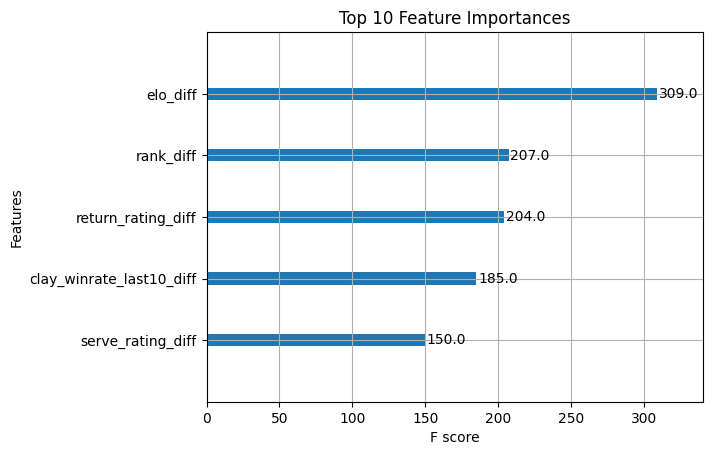

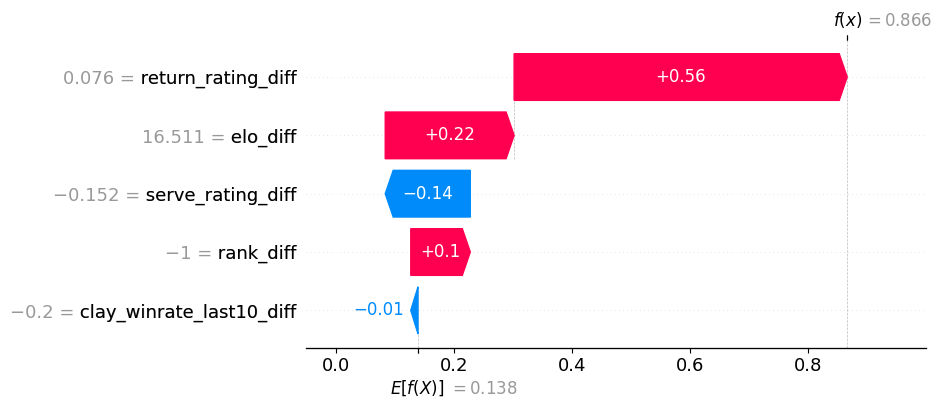

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
import shap
import matplotlib.pyplot as plt

# ⚡ CELL B – Train & Evaluate XGBoost

# 1. Prepare matrices
X_train = train_df[features]
y_train = train_df['label']
X_val   = val_df[features]
y_val   = val_df['label']

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)

# 2. Parameter set
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.05,
    'max_depth': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'lambda': 1.0,
    'alpha': 0.0,
    'random_state': 42
}

watchlist = [(dtrain, 'train'), (dval, 'val')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=watchlist,
    early_stopping_rounds=50,
    verbose_eval=False
)

# 3. Predictions
probs = bst.predict(dval)
preds = (probs >= 0.5).astype(int)
acc = accuracy_score(y_val, preds)
auc = roc_auc_score(y_val, probs)

print("📊 XGBoost Temporal Validation (Train <2024, Validate 2024):")
print(f"✅ Accuracy: {acc:.3f}")
print(f"✅ AUC: {auc:.3f}")

# 4. Feature importance plot
xgb.plot_importance(bst, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

# 5. SHAP Interpretation (optional, comment out if slow)
explainer = shap.Explainer(bst, X_val)
shap_values = explainer(X_val)
shap.plots.waterfall(shap_values[0])  # View 1st prediction explanation
